In [1]:
import pickle as pk
import pandas as pd
from tqdm import tqdm
from pymatgen.core.structure import Structure, Molecule
from megnet.models import MEGNetModel
from megnet.data.crystal import CrystalGraph
import numpy as np
from sklearn.model_selection import train_test_split
import random

d:\Projects\projects_python\m3gnet_tests\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torch_geometric.datasets import QM9

dataset = QM9(root='data\\qm9')

In [3]:
qm9 = pd.read_csv("data\\qm9\\raw\\gdb9.sdf.csv")

In [4]:
qm9

,mol_id,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,157.71180,157.709970,157.706990,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
1,gdb_2,293.60975,293.541110,191.393970,1.6256,9.46,-0.2570,0.0829,0.3399,26.1563,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,799.58812,437.903860,282.945450,1.8511,6.31,-0.2928,0.0687,0.3615,19.0002,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171
3,gdb_4,0.00000,35.610036,35.610036,0.0000,16.28,-0.2845,0.0506,0.3351,59.5248,0.026841,-77.308427,-77.305527,-77.304583,-77.327429,8.574,-385.501997,-387.237686,-389.016047,-365.800724
4,gdb_5,0.00000,44.593883,44.593883,2.8937,12.99,-0.3604,0.0191,0.3796,48.7476,0.016601,-93.411888,-93.409370,-93.408425,-93.431246,6.278,-301.820534,-302.906752,-304.091489,-288.720028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133880,gdb_133881,3.59483,2.198990,1.904230,1.6637,69.37,-0.2254,0.0588,0.2842,760.7472,0.127406,-400.633868,-400.628599,-400.627654,-400.663098,23.658,-1603.983913,-1614.898804,-1623.788097,-1492.819438
133881,gdb_133882,3.65648,2.142370,1.904390,1.2976,69.52,-0.2393,0.0608,0.3002,762.6354,0.127495,-400.629713,-400.624444,-400.623500,-400.658942,23.697,-1601.376613,-1612.291504,-1621.181424,-1490.211511
133882,gdb_133883,3.67118,2.143140,1.895010,1.2480,73.60,-0.2233,0.0720,0.2953,780.3553,0.140458,-380.753918,-380.748619,-380.747675,-380.783148,23.972,-1667.045429,-1678.830048,-1688.312964,-1549.143391
133883,gdb_133884,3.52845,2.151310,1.865820,1.9576,77.40,-0.2122,0.0881,0.3003,803.1904,0.152222,-364.720374,-364.714974,-364.714030,-364.749650,24.796,-1794.600439,-1807.210860,-1817.286772,-1670.349892


In [5]:
qm9.u0.describe()

count    133885.000000
mean       -411.543985
std          40.060230
min        -714.568061
25%        -437.913936
50%        -417.864758
75%        -387.049166
max         -40.478930
Name: u0, dtype: float64

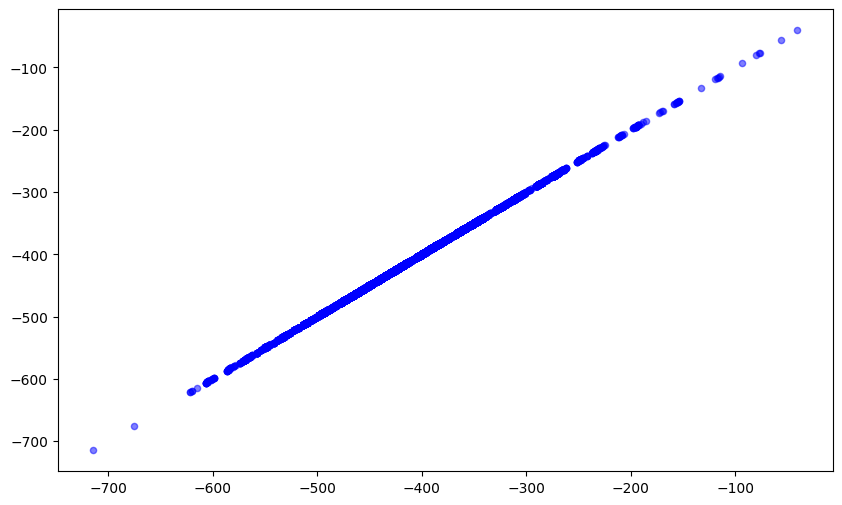

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(qm9.u0, qm9.u0, color='b', alpha=0.5, s=20) 

In [7]:
data = pd.read_csv('data/data_all_new.csv')

In [8]:
data.U_0.describe()

count    122381.000000
mean       -308.037459
std         144.947457
min        -884.878966
25%        -385.432941
50%        -269.991141
75%        -193.288318
max         -79.584155
Name: U_0, dtype: float64

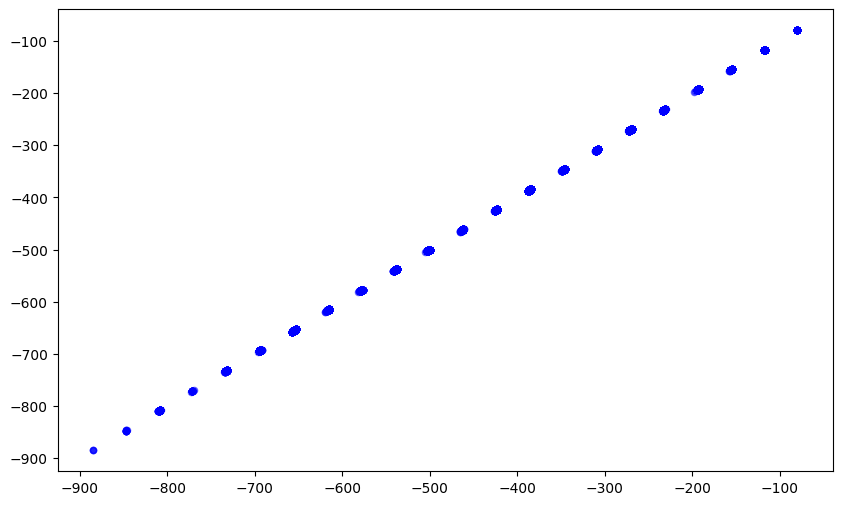

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data.U_0, data.U_0, color='b', alpha=0.5, s=20) 

In [10]:
data['u_0(eV)'] = data['U_0'] * 27.211

In [11]:
data

,xyz,U_0,id_init,id,u_0(eV)
0,10\n\nH 1.594980000000 64.910800000000 95.0391...,-193.284402,24639,0,-5259.461862
1,9\n\nH 63.280500000000 60.457300000000 48.2741...,-117.736584,13623,1,-3203.730189
2,13\n\nH 26.454700000000 11.674300000000 62.229...,-269.937593,62604,2,-7345.271840
3,24\n\nC 13.160700000000 53.348800000000 37.940...,-463.805146,20405,3,-12620.601832
4,8\n\nH 52.589400000000 47.483500000000 63.6278...,-154.582836,3769,4,-4206.353552
...,...,...,...,...,...
122376,15\n\nH 73.699800000000 16.621900000000 44.995...,-271.120573,54809,122376,-7377.461923
122377,13\n\nH 60.124400000000 90.417300000000 11.934...,-269.898030,752,122377,-7344.195296
122378,27\n\nH 89.053700000000 27.586700000000 26.090...,-540.602474,47418,122378,-14710.333919
122379,10\n\nH 36.702100000000 21.812100000000 75.362...,-193.306156,27737,122379,-5260.053808


In [12]:
molecules = []
targets = []

for i, row in tqdm(data.iterrows(), total=data.shape[0]):
    molecules.append(Molecule.from_str(row['xyz'], 'xyz'))
    targets.append(row['u_0(eV)'] / len(molecules[-1]))

100%|██████████| 122381/122381 [00:56<00:00, 2159.51it/s]


In [13]:
def create_structure_dict(structures: list, targets: list):
    structure_dict = {}

    for structure in tqdm(zip(structures, targets), total=len(structures)):
        if structure[0].formula in structure_dict:
            structure_dict[structure[0].formula].append(structure)
        else:
            structure_dict[structure[0].formula] = [structure]
        
    return structure_dict

def train_test_split_for_structures(structure_dict: dict, test_size: float = 0.2):
    structures_train, structures_test = [], []
    targets_train, targets_test = [], []
    train_all, test_all = [], []

    for _, data in tqdm(structure_dict.items()):
        if len(data) < 2:
            train_all += data
        else:
            train_data, test_data = train_test_split(data, test_size=test_size, random_state=42)
            train_all += train_data
            test_all += test_data
    
    random.shuffle(train_all)
    random.shuffle(test_all)

    for t_data in train_all:
        structures_train.append(t_data[0])
        targets_train.append(t_data[1])
    
    for te_data in test_all:
        structures_test.append(te_data[0])
        targets_test.append(te_data[1])
    
    return structures_train, targets_train, structures_test, targets_test

In [14]:
structure_dict = create_structure_dict(molecules, targets)
molecules_train, targets_train, molecules_val_test, targets_val_test = train_test_split_for_structures(structure_dict)
structure_dict_val_test = create_structure_dict(molecules_val_test, targets_val_test)
molecules_val, targets_val, molecules_test, targets_test = train_test_split_for_structures(structure_dict_val_test, 0.5)

100%|██████████| 117/117 [00:00<00:00, 5166.60it/s]


In [16]:
model = MEGNetModel.from_file("callback\\39e_64b_predqm9_eV\\val_mae_00039_0.650056.hdf5")

In [17]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

loss_values = []

class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss_values.append(logs.get('loss'))

name = "39+61e_64b_predqm9_eV"
log_dir = f"logs/fit/{name}"  # Путь для сохранения журналов TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1, write_images=True, update_freq = 'epoch')

history = LossHistory()

model.train(train_structures=molecules_train,
            train_targets=targets_train,
            validation_structures=molecules_val,
            validation_targets=targets_val,
            epochs=61,
            dirname=f'callback/{name}',
            batch_size=64,
            callbacks=[history, tensorboard_callback])

Epoch 1/61
1530/1530 [==============================] - 274s 175ms/step - loss: 6.3703
Epoch 2/61
1530/1530 [==============================] - 259s 169ms/step - loss: 0.4190
Epoch 3/61
1530/1530 [==============================] - 258s 169ms/step - loss: 0.5264
Epoch 4/61
1530/1530 [==============================] - 259s 169ms/step - loss: 0.7094
Epoch 5/61
1530/1530 [==============================] - 260s 170ms/step - loss: 0.9714
Epoch 6/61
1530/1530 [==============================] - 261s 170ms/step - loss: 0.7896
Epoch 7/61
1530/1530 [==============================] - 261s 171ms/step - loss: 0.4261
Epoch 8/61
1530/1530 [==============================] - 262s 171ms/step - loss: 2.8880
Epoch 9/61
1530/1530 [==============================] - 264s 173ms/step - loss: 0.3478
Epoch 10/61
1530/1530 [==============================] - 283s 185ms/step - loss: 0.4238
Epoch 11/61
1530/1530 [==============================] - 273s 179ms/step - loss: 0.5395
Epoch 12/61
1530/1530 [==================

In [18]:
model.save_model(f'models/{name}.hdf5')

In [19]:
import os
import pickle

# Create the directory structure if it does not exist
os.makedirs('logs/lists/', exist_ok=True)

with open(f'logs/lists/{name}.pkl', 'wb') as f:
    pickle.dump(loss_values, f)

In [20]:
y_pred = np.array([])
y_true = np.array([])

for i in tqdm(range(len(molecules_test))):
    y_pred = np.append(y_pred, model.predict_structure(molecules_test[i])*len(molecules_test[i]))
    y_true = np.append(y_true, targets_test[i]*len(molecules_test[i]))
    if np.isneginf(y_pred[-1]):
        print(i, y_pred[-1], molecules_test[i])
mae = np.mean(np.abs(y_true - y_pred))
mae

100%|██████████| 12274/12274 [18:39<00:00, 10.96it/s] 


549.2476726493423

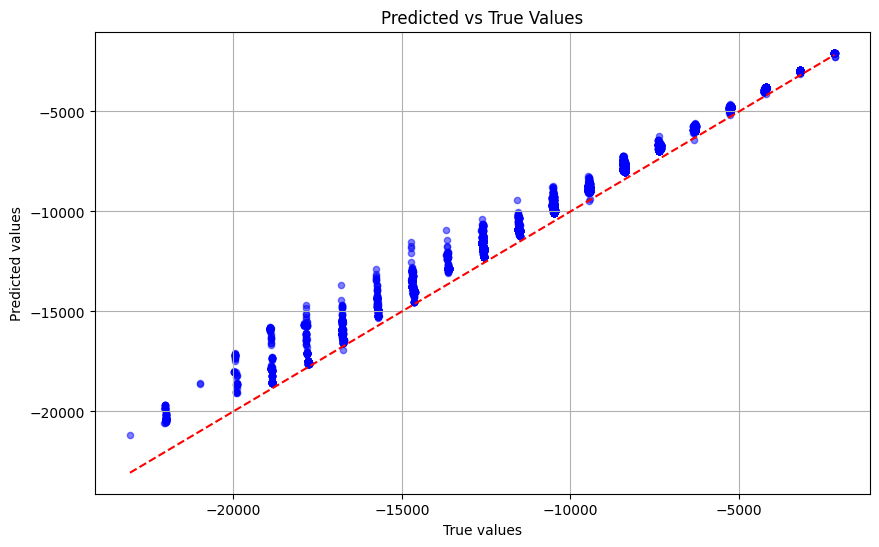

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, color='b', alpha=0.5, s=20) 
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='r', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Predicted vs True Values')
plt.grid(True)